# Visualizing Google Trends Data and Statistics Related to Turkey

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Especially after the elections of 2018, Turkish economy entered into a recession. During this recession period, Turkish lira plummeted against both US Dollar and Euro. After looking at several datasets from TUIK (Türk İstatistik Kurumu), I saw the effects of this recession on two different areas: New Car Sales and Technology Spending

### 1) Monthly New Car Sales between 2015-19

Here you can see the monthly car sales data for every year. X axis is shared for all 5 years, making it easier to compare different years. It is quite easy to observe that in 2018 and 2019, sale numbers drop rapidly.

In [2]:
car_sales = pd.read_excel("car_sales.xls").melt(id_vars="year", var_name="month", value_name="sale")
car_sales = car_sales.dropna()
car_sales = car_sales[car_sales.year >= 2015];

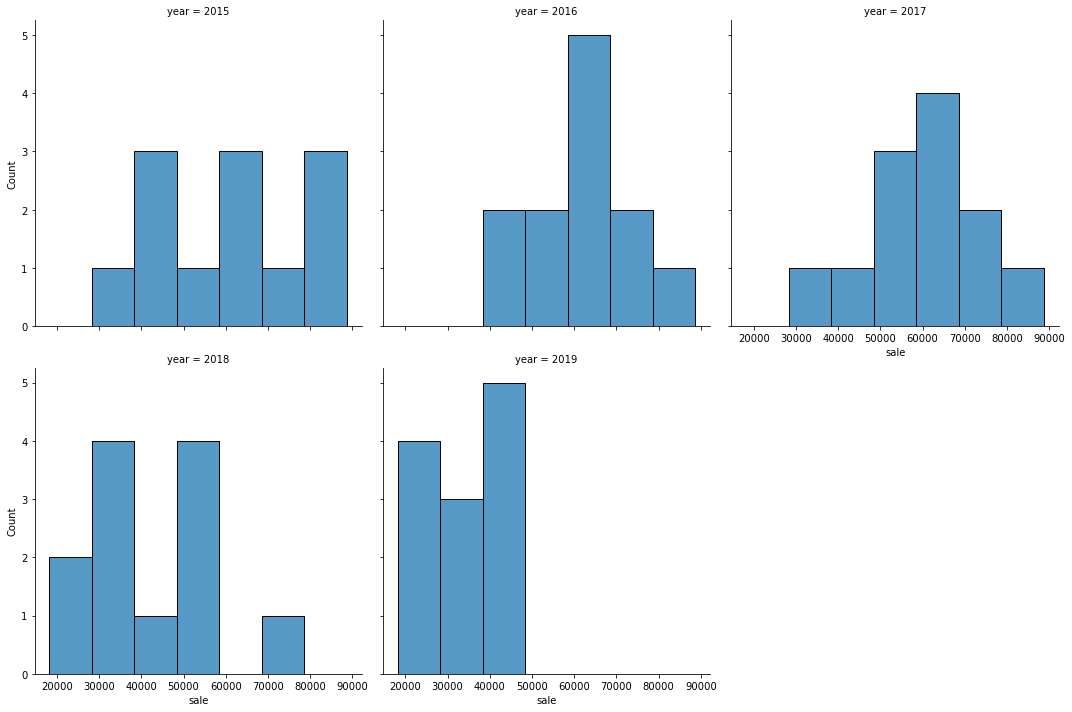

In [3]:
sns.displot(car_sales, x="sale", col="year", col_wrap=3);

To make the comparison easier, I used violin plots to compare different years. Stable between 2015 and 2017, with a mean around 60k, sales show great deviation during 2018. Since the rapid increase of the USD/TRY rate happened in third quarter, the drop did not start until summer. 2019 is more steady and the mean monthly car sale is almost 30k, half of what it was two years ago.

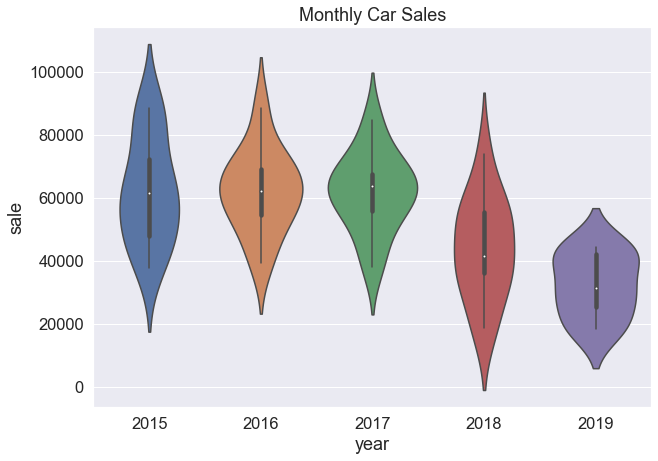

In [4]:
sns.set(font_scale=1.5, rc={'figure.figsize':(10, 7)})
sns.violinplot(data=car_sales, x="year", y="sale").set_title("Monthly Car Sales");

Every new car sold in Turkey have to be registered with the General Directorate of Security (EGM) before being allowed into the traffic. After this registration (trafik tescil), a ruhsat is issued. 
The drop in new car sales can also be seen on the Google Trends data for "trafik tescil". It has an increasing trend before 2018 and drops rapidly in 2018 and 2019, reaching an all time low. This correlation is an interesting one, and since the trafik tescil belgesi is only issued when a new car is sold and not when a car is bought second-hand, can be used to predict further sales data.

In [5]:
trafik_tescil_trends = pd.read_csv("trafik_tescil.csv", index_col="week", parse_dates=True)
trafik_tescil_trends["year"] = trafik_tescil_trends.index.year;

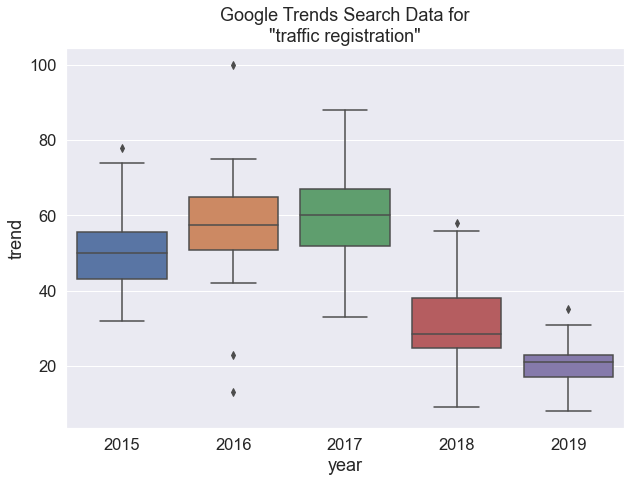

In [6]:
sns.boxplot(data=trafik_tescil_trends, x="year", y="trend").set_title('Google Trends Search Data for\n"traffic registration"');

### 2) Technologic Spending Index

Following data is also obtained from TUIK MEDAS and is adjusted for seasonality in a year.
Technologic Spending Index is the monthly tech products sales volume in Turkey, relative to year 2015. Year 2015 is set to 100 and rest is calculated accordingly. 
From both the histograms and the boxplot, it can be seen, that even though there is again a huge deviation in 2018, the tech spending over the years is stable especially after the jump in 2017. 

In [7]:
tech_sales = pd.read_excel("tech_sales.xls").melt(id_vars="year", var_name="month", value_name="sale")
tech_sales = tech_sales[tech_sales.year >= 2015]

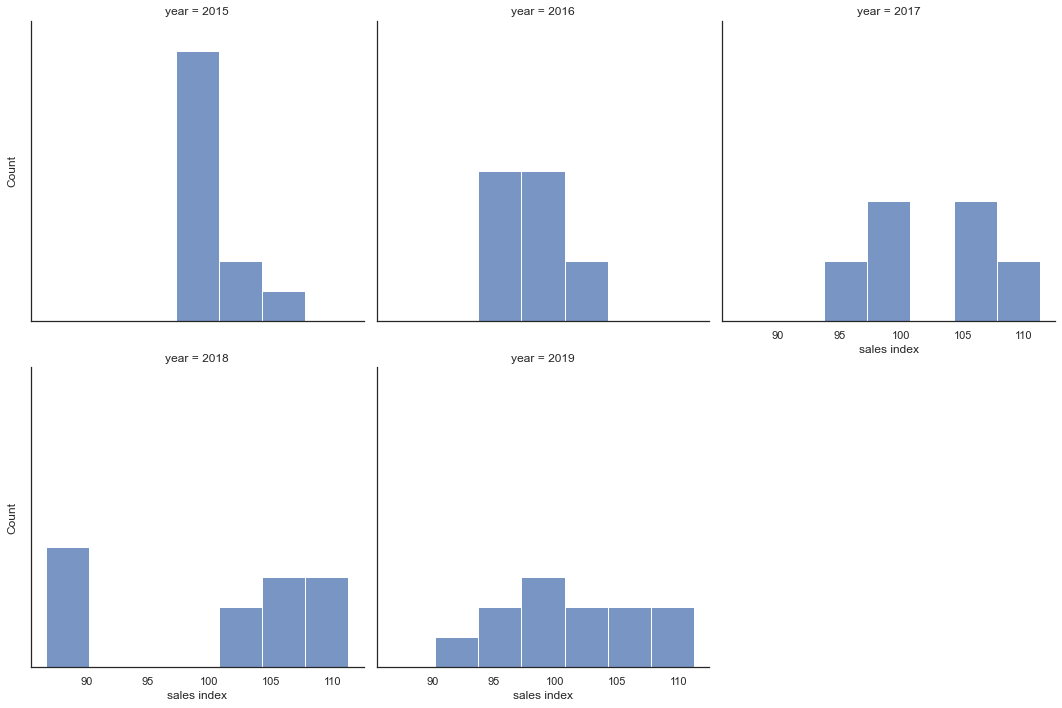

In [8]:
sns.set()
sns.set_style("white")

fg = sns.displot(tech_sales, x="sale", col="year", col_wrap=3)
fg.set_xlabels("sales index")
fg.set_yticklabels([]);

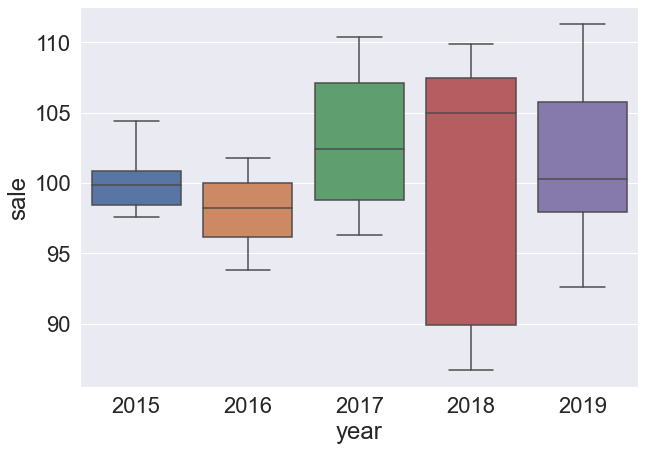

In [9]:
sns.set(font_scale=2)
sns.boxplot(data=tech_sales, x="year", y="sale");

However, if we were to look at the global spending data in that period, we see that it is increasing and its ascend is not slowing at all. Turkish data on the other hand is not increasing.
If we consider that almost all of the tech products sold in Turkey are imported, thereby making their prices strongly related to the currency rate, if the sales were truly stable, we would expect the index to be higher.

In [10]:
smartphone_trends = pd.read_csv("smartphone_trend.csv", index_col="Week", parse_dates=True)
smartphone_trends["year"] = smartphone_trends.index.year

global_tech = pd.read_csv("total_tech_spending.csv", sep=";")

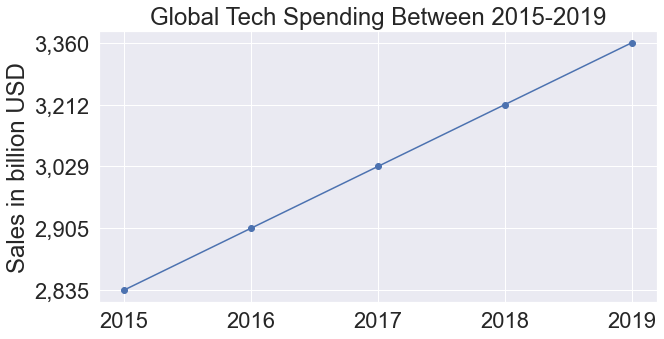

In [11]:
plt.figure(figsize=(10, 5))
plt.plot("Year", "Sales", data=global_tech, marker="o")
plt.xticks(global_tech.Year)
plt.ylabel("Sales in billion USD")
plt.title("Global Tech Spending Between 2015-2019");

This corollary can also be seen on the Google Trends data for "akıllı telefon". It is sharply declining over the last 5 years, indicating a lower interest to buy smartphones.

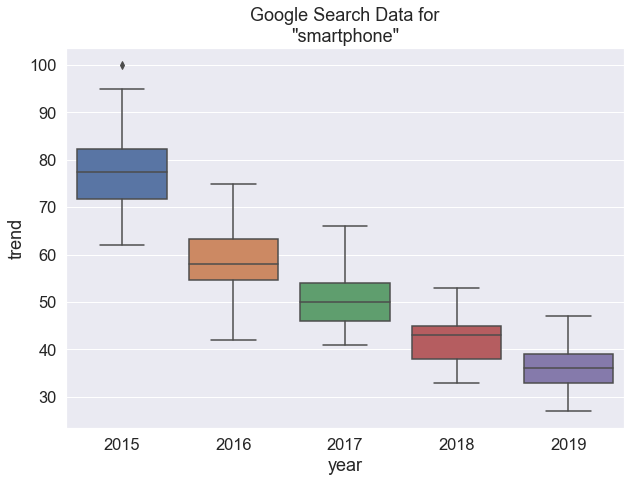

In [12]:
sns.set(font_scale=1.5)
sns.boxplot(data=smartphone_trends, x="year", y="trend").set_title('Google Search Data for\n"smartphone"');

### 3) Butter Production in Turkey between 2015 and 2019

One of the common theme of discussion between the "nutritionists" who appear on daytime television, such as Canan Karatay, is to eat more butter. Once she even suggested to eat butter spread on radish. Coffee or tea with a teaspoon of butter in it, called "bulletproof", is currently popular among both millenials and the older generation.
Regardless of the trends and what Mrs Karatay prefers to say, especially against the unhealty alternative of margarine, butter is the healthier and more delicious one.
Apparently Turkish people also agrees on this. Butter production in Turkey is 6 times of what it was in 2010, and increased 50% over the last 5 years.

In [13]:
butter_production = pd.read_excel("butter.xls").melt(id_vars="year", var_name="month", value_name="sale")

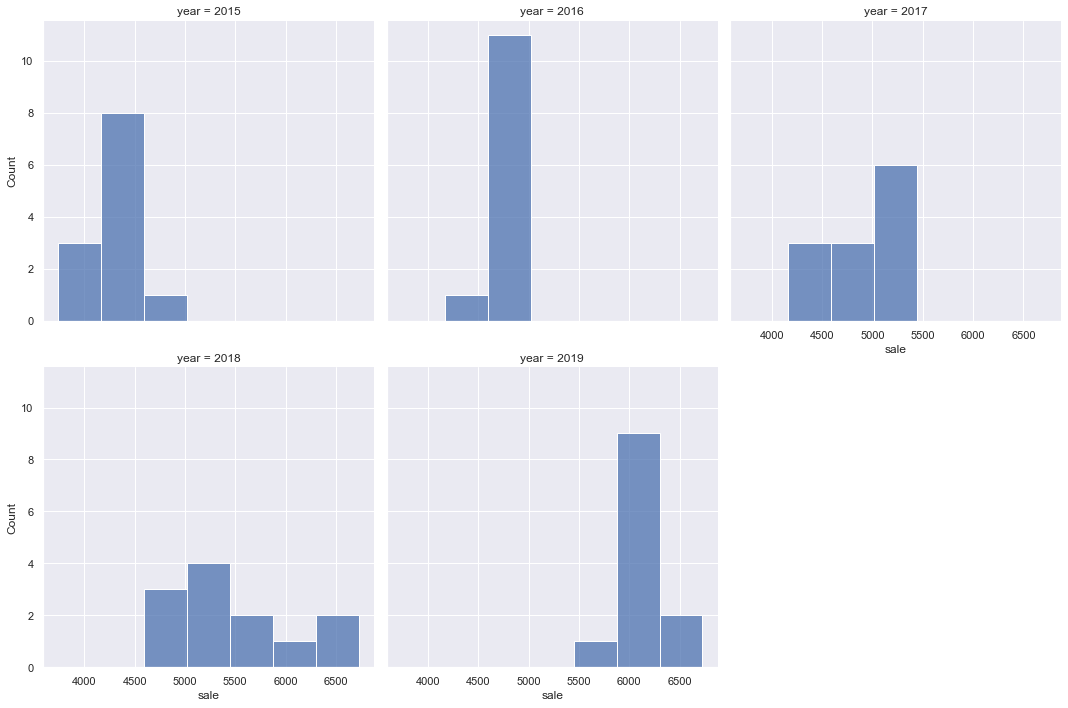

In [14]:
sns.set()
sns.displot(butter_production, x="sale", col="year", col_wrap=3);

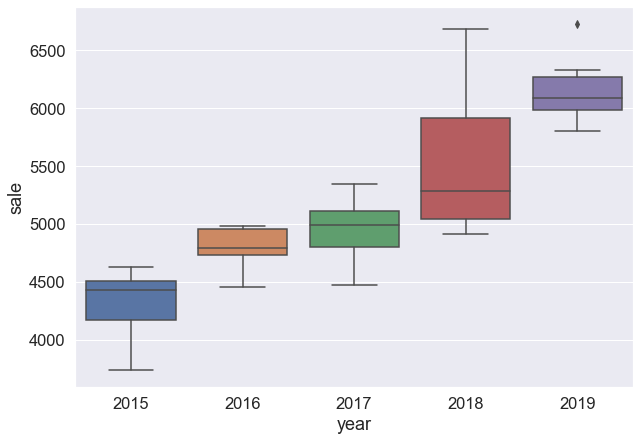

In [15]:
sns.set(font_scale=1.5)
sns.boxplot(data=butter_production, x="year", y="sale");

A common ingredient in our kitchens, Google searches for butter are also double of what they were in 2015. Meaning that people are more interested in using and buying butter. This correlates greatly with the previous data. 

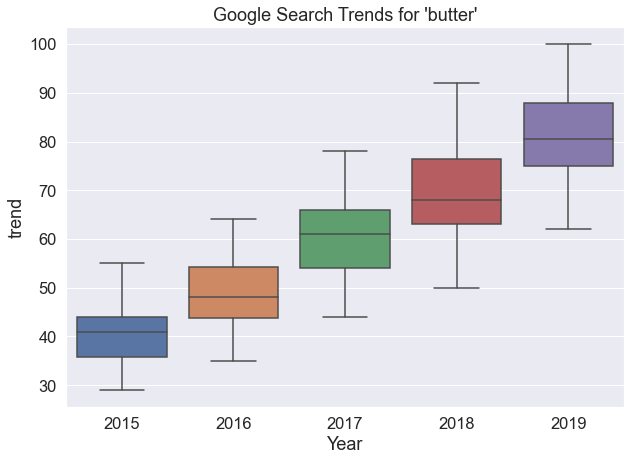

In [16]:
butter_trend = pd.read_csv("butter_trend.csv", parse_dates=True, index_col="Week")
butter_trend["Year"] = butter_trend.index.year

sns.boxplot(x=butter_trend.Year, y=butter_trend.trend).set_title("Google Search Trends for 'butter'");

### Extra: Written Press Sales

In the era of smartphones and tablets, we no longer read printed newspapers or magazines. We download them, we use apps to read news, we no longer look for newspaper stands to buy the long awaited edition of our favorite magazine. Because I could not find a more frequent dataset, I only used yearly sales data to show that printed press is suffering. Sales are down to half for newspapers, even worse for magazines. One newspaper used to sell what the whole market currently sells. This is also true for Google Trends: Interest for magazines and newspapers are at all time low, with even more decline on the way. Publishers who could not adapt to the internet age are suffering and this keeps on going.

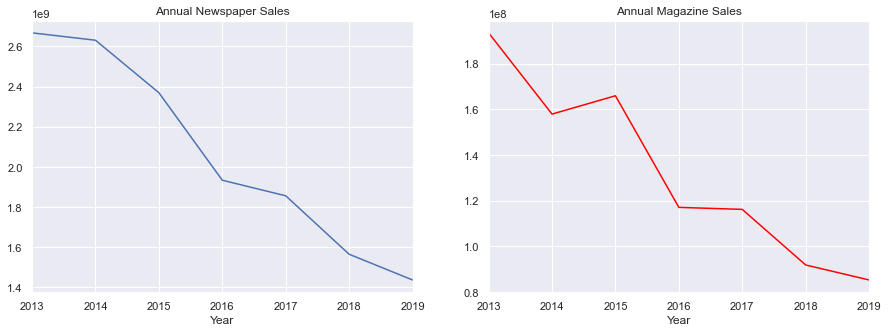

In [17]:
sns.set()
yayin = pd.read_excel("yayin.xls", index_col="Year", parse_dates=True)

newspaper_trends = pd.read_csv("newspaper_trend.csv", index_col="Month", parse_dates=True)
magazine_trends = pd.read_csv("magazine_trend.csv", index_col="Month", parse_dates=True)
yayin_trend = pd.merge(newspaper_trends, magazine_trends, on="Month")
yayin_trend.columns = ["newspaper", "magazine"]
yayin_trend["Year"] = yayin_trend.index.year

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
yayin.plot(y="newspaper", legend=False, title="Annual Newspaper Sales", ax=ax[0])
yayin.plot(y="magazine", legend=False, color="red", title="Annual Magazine Sales", ax=ax[1]);

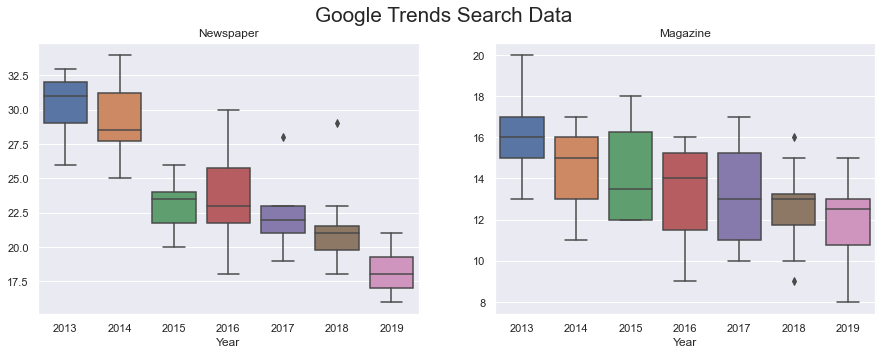

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Google Trends Search Data", fontsize="xx-large")
sns.boxplot(data=yayin_trend, x="Year", y="newspaper", ax=ax[0]).set_title("Newspaper")
sns.boxplot(data=yayin_trend, x="Year", y="magazine", ax=ax[1]).set_title("Magazine")
ax[0].set_ylabel("")
ax[1].set_ylabel("");

## Sources
[TUIK Merkezi Dağıtım Merkezi](biruni.tuik.gov.tr/medas)

[Statista](statista.com/statistics/886397/total-tech-spending-worldwide)

[Google Trends](trends.google.com)

You can find the Jupyter Notebook for this page [here](files/ie360_hw1.ipynb).

Related data are [here](files/hw1_data.zip).